In [6]:
import sklearn
import numpy as np
import pandas as pd
import shap

shap.initjs()
# import standard scaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [7]:
Activities = [0.001, 2.0, 3.94, 6.47, 28.45]

In [218]:
data_dict = {
    "WT": {
        "Mean_Distance": 17.10,
        "Var_Distance": 9.25,
        "Binding_G": -10.76,
        "TS_dG": 34.17,
        "RXN_dG": -25.0,
        "Activity": 0.01,
    },
    "LVRQ": {
        "Mean_Distance": 7.78,
        "Var_Distance": 3.35,
        "Binding_G": -23.30,
        "TS_dG": 18.95,
        "RXN_dG": -36.19,
        "Activity": 2.0,
    },
    "LVRQL": {
        "Mean_Distance": 8.87,
        "Var_Distance": 8.72,
        "Binding_G": -18.90,
        "TS_dG": 20.57,
        "RXN_dG": -34.48,
        "Activity": 3.94,
    },
    "GLVRSQL": {
        "Mean_Distance": 4.44,
        "Var_Distance": 0.93,
        "Binding_G": -23.46,
        "TS_dG": 30.0,
        "RXN_dG": -23.90,
        "Activity": 6.47,
    },
    "GLAVRSQLL": {
        "Mean_Distance": 4.53,
        "Var_Distance": 1.09,
        "Binding_G": -25.69,
        "TS_dG": 23.23,
        "RXN_dG": -36.20,
        "Activity": 28.45,
    },
}


In [219]:
def dict_to_array(keys=["Mean_Distance", "Binding_G"]):
    ret_array = []
    for x in data_dict.keys():
        temp_array = [data_dict[x][key] for key in keys]
        ret_array.append(temp_array)
    return np.array(ret_array)

In [249]:
X_feats = ["Mean_Distance", "RXN_dG", "Var_Distance"]
# X = np.array([list(data_dict[x].values())[:-1] for x in data_dict.keys()])
# X = np.array([list(data_dict[x][X_feats]) for x in data_dict.keys()])

X = dict_to_array(X_feats)
X = X[1:]

# make X a df with the column names
X = pd.DataFrame(X, columns=X_feats)
y = np.array([data_dict[x]["Activity"] for x in data_dict.keys()])
y = y[1:]
# log scale y
y = np.log(y)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# convert to df with column names
X_std = pd.DataFrame(X_std, columns=X_feats)
model = LinearRegression()
model.fit(X_std, y)


LinearRegression()

In [250]:
# get r2
print("r2: ", model.score(X_std, y))
# plot the model
explainer = shap.LinearExplainer(
    model, X_std[1:], feature_perturbation="correlation_dependent"
)
shap_values = explainer(X_std)
#


r2:  1.0


The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


Text(0, 0.5, 'Predicted Log(Yield %)')

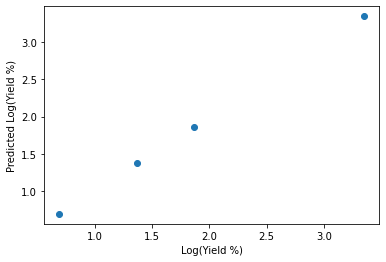

In [251]:
# scatter plot
import matplotlib.pyplot as plt

plt.scatter(y, model.predict(X_std))
plt.xlabel("Log(Yield %)")
plt.ylabel("Predicted Log(Yield %)")


In [252]:
explainer = shap.explainers.Linear(model, X_std)
shap_values = explainer(X_std)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [253]:
X_std

,Mean_Distance,RXN_dG,Var_Distance
0,0.702049,-0.682518,-0.054768
1,1.258583,-0.348821,1.650169
2,-1.003292,1.715808,-0.823100
3,-0.957340,-0.684469,-0.772301


In [254]:
shap_values.shape

(4, 3)

In [255]:
shap_values  # [:, 0]

.values =
array([[-1.49155515,  0.43132591, -0.06653663],
       [-2.67395159,  0.22044176,  2.00477751],
       [ 2.1315679 , -1.08432683, -0.99997801],
       [ 2.03393884,  0.43255915, -0.93826287]])

.base_values =
array([1.81991304, 1.81991304, 1.81991304, 1.81991304])

.data =
array([[ 0.70204935, -0.68251772, -0.05476751],
       [ 1.25858303, -0.34882071,  1.65016891],
       [-1.00329235,  1.71580758, -0.82310013],
       [-0.95734003, -0.68446916, -0.77230128]])

In [256]:
# we add back the feature names stripped by the StandardScaler
# for i, c in enumerate(X.columns):
#    shap_values.feature_names[i] = c

# we convert back to the original data
# (note we can do this because X_std is a set of univariate transformations of X)
# shap_values.data = X.values

# visualize the model's dependence on the first feature again, now in the new original feature space
shap.plots.scatter(shap_values)


Exception: The passed Explanation object has multiple columns, please pass a single feature column to shap.plots.dependence like: shap_values[:,column]

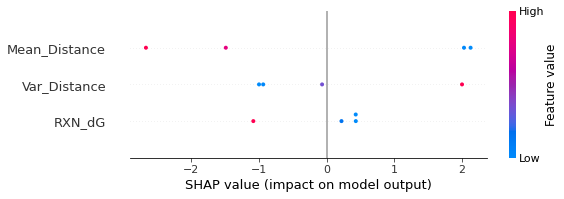

In [257]:
shap.plots.beeswarm(shap_values)


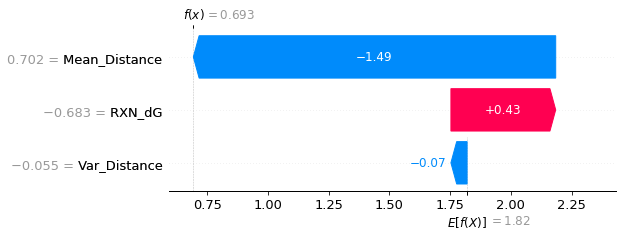

In [258]:
shap.plots.waterfall(shap_values[0])
# add title to plot

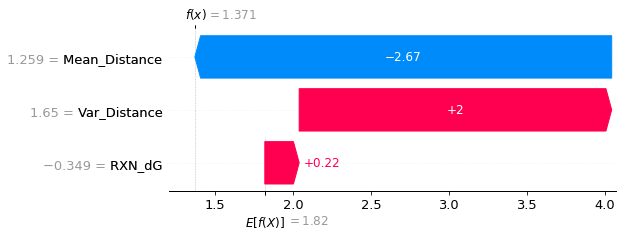

In [259]:
shap.plots.waterfall(shap_values[1])


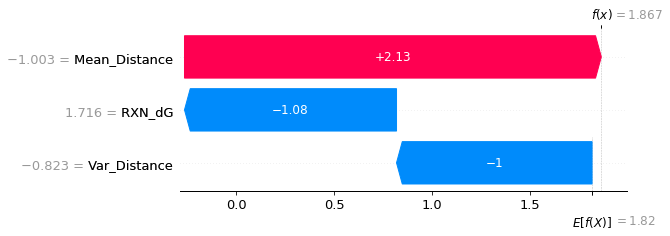

In [260]:
shap.plots.waterfall(shap_values[2])


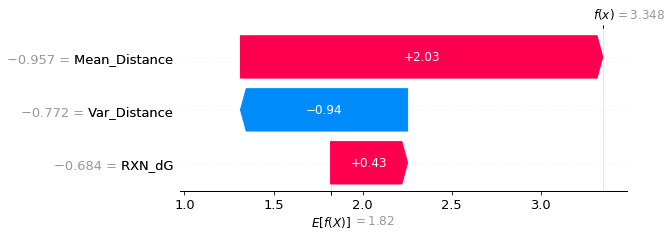

In [261]:
shap.plots.waterfall(shap_values[3])


In [265]:
shap.plots.waterfall(shap_values[4])


IndexError: index 4 is out of bounds for axis 0 with size 4

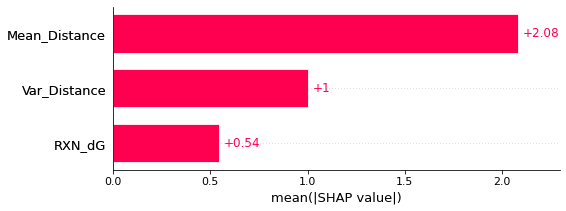

In [263]:
shap.plots.bar(shap_values)


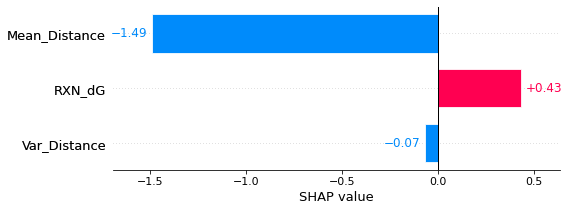

In [264]:
shap.plots.bar(shap_values[0])


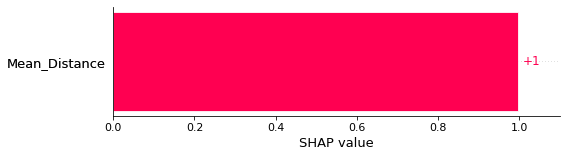

In [125]:
shap.plots.bar(shap_values[1])


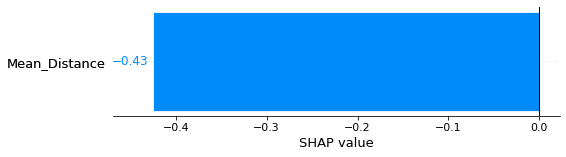

In [126]:
shap.plots.bar(shap_values[2])


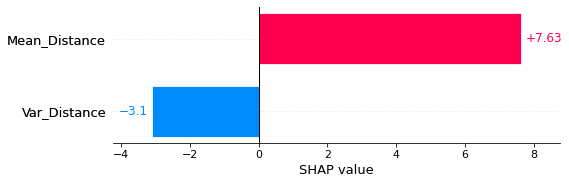

In [107]:
shap.plots.bar(shap_values[3])


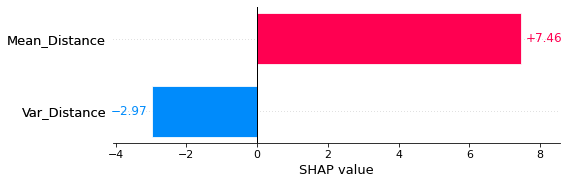

In [108]:
shap.plots.bar(shap_values[4])


In [266]:
expected_value = explainer.expected_value
features_display = X.columns

In [276]:
list(features_display)

['Mean_Distance', 'RXN_dG', 'Var_Distance']

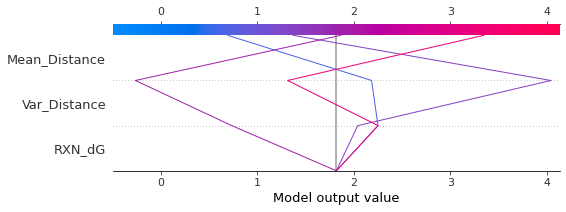

In [278]:
order = ['Mean_Distance', 'RXN_dG','Var_Distance']
shap.decision_plot(expected_value, explainer.shap_values(X_std), order)#[::-1])


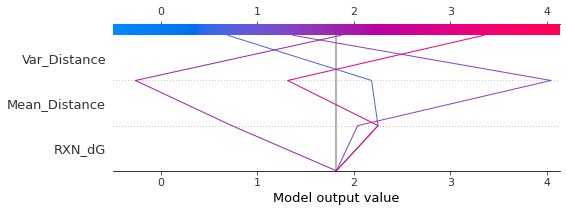

In [275]:
shap.decision_plot(expected_value, explainer.shap_values(X_std), features_display[)